In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from library.sb_utils import save_file

In [3]:
data = pd.read_csv('../train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(data.shape)
data.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [6]:
data.select_dtypes('int64').T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
OverallQual,7,6,7,7,8,5,8,7,7,5,...,5,8,5,5,7,6,6,7,5,5
OverallCond,5,8,5,5,5,5,5,6,5,6,...,5,5,5,5,5,5,6,9,6,6
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965
YearRemodAdd,2003,1976,2002,1970,2000,1995,2005,1973,1950,1950,...,1974,2009,2005,2006,2005,2000,1988,2006,1996,1965
BsmtFinSF1,706,978,486,216,655,732,1369,859,0,851,...,0,0,547,0,410,0,790,275,49,830
BsmtFinSF2,0,0,0,0,0,0,0,32,0,0,...,0,0,0,0,0,0,163,0,1029,290
BsmtUnfSF,150,284,434,540,490,64,317,216,952,140,...,896,1573,0,1140,811,953,589,877,0,136


In [7]:
data.select_dtypes('object').T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [8]:
#How many null values are there per column?
find_null_columns = {}
for column in data.columns:
    if(len(data[data[column].isnull()]) > 0):
        find_null_columns[column] = len(data[data[column].isnull()])
print('Number of null values:' + os.linesep)
for k,v in sorted(find_null_columns.items(), key=lambda x: x[1], reverse=True):
    print(k + ': ' + str(v))

Number of null values:

PoolQC: 1453
MiscFeature: 1406
Alley: 1369
Fence: 1179
FireplaceQu: 690
LotFrontage: 259
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
BsmtExposure: 38
BsmtFinType2: 38
BsmtQual: 37
BsmtCond: 37
BsmtFinType1: 37
MasVnrType: 8
MasVnrArea: 8
Electrical: 1


In [9]:
#There is such little data on pools, I want to remove pool related columns, only after looking at the data.
print(str(data[data['PoolArea'] > 0]['PoolArea']) + os.linesep*2 + str(data[data['PoolArea'] > 0]['SalePrice']))

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

197     235000
810     181000
1170    171000
1182    745000
1298    160000
1386    250000
1423    274970
Name: SalePrice, dtype: int64


In [10]:
#I notice an interesting trend in that pools are associated with higher sales prices.
#With that said, I don't think it tells much in terms of size, and with such little pool data,
#I believe the most important factor is whether the home has a pool or not, and that may be
#significant, therefore I will remove these values and simply add a column HasPool boolean.
#In the event that I later find that pools are a significant explanation of outliers, then I 
#may remove those observations from the dataset.
print(data.shape)
print(data['PoolQC'].unique())
data['HasPool'] = data['PoolQC'].isin(['Ex','Fa','Gd'])
print(data.shape)
data.drop(columns=['PoolQC','PoolArea'], inplace=True)
print(len(data[data['HasPool']]))
print(data.shape)

(1460, 81)
[nan 'Ex' 'Fa' 'Gd']
(1460, 82)
7
(1460, 80)


In [11]:
#I'm also going to look into the values of MiscFeature to see if there may be enough data to analyze.
print(data['MiscFeature'].unique())
#The greatest concern I have with this column is 'Other', so I want to see how frequent it appears.
print(data[data['MiscFeature'] == 'Othr']['MiscFeature'].count())
#Because there are only two, I'm wondering how much those two will skew the data.
print(data[data['MiscFeature'] == 'Othr']['SalePrice'])
#I believe these could be negative impacts on the sales price, though we can't be 
#certain, given the low saleprice of each.
#Additionally, there doesn't seem to be any quality indicators for these values, so I will remove this column.

data.drop(columns=['MiscFeature'], inplace=True)
print(data.shape)

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
2
705     55000
873    133000
Name: SalePrice, dtype: int64
(1460, 79)


In [12]:
#Now the MiscVal column has my attention, I will examine it.
print(data['MiscVal'].unique())
#The greatest concern I have with this column is 'Other', so I want to see how frequent it appears.
print(data[data['MiscVal'] != 0]['MiscVal'].count())
#Because there are only two, I'm wondering how much those two will skew the data.
print("{:.2f}".format(data[data['MiscVal'] != 0]['SalePrice'].mean()))
#I see the mean of these homes that have miscellaneous features are somewhat low, and the majority
#of observations do not have any value here, so I will remove it.
data.drop(columns=['MiscVal'], inplace=True)

[    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]
52
152666.21


In [13]:
#There is also a lot of missing data for fences, so I'm gonna see what types of values we have.
print(data['Fence'].unique())
#I didn't know what these meant, so I turned to the documentation. It turns out this indicates 
#mostly a level of privacy, and might be better as a boolean. Another interesting fact might be
#a correlation between the home type and whether it has a fence. For example, rowHomes may have 
#small fences, condo's may have none at all. I'm thinking that any correlation between fence and
#price may correspond to a type of housing, and as about 4/5ths of the homes have no fence data
#listed, I believe the best move is to remove this column.
data.drop(columns=['Fence'], inplace=True)
data.shape

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


(1460, 77)

In [14]:
#How many null values are there per column?
find_null_columns = {}
for column in data.columns:
    if(len(data[data[column].isnull()]) > 0):
        find_null_columns[column] = len(data[data[column].isnull()])
print('Number of null values:' + os.linesep)
for k,v in sorted(find_null_columns.items(), key=lambda x: x[1], reverse=True):
    print(k + ': ' + str(v))
#I still see alley's are the biggest row of null values, and I will look into those
#in more detail next. I don't know much about alleys.

Number of null values:

Alley: 1369
FireplaceQu: 690
LotFrontage: 259
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
BsmtExposure: 38
BsmtFinType2: 38
BsmtQual: 37
BsmtCond: 37
BsmtFinType1: 37
MasVnrType: 8
MasVnrArea: 8
Electrical: 1


In [15]:
#Range, mean and median of home values
print('Range of prices: ' + os.linesep + '$' + str(data['SalePrice'].min()) + ' - $' + str(data['SalePrice'].max()))
print('Mean: $' + "{:.2f}".format(data['SalePrice'].mean()))
print('Median: $' + "{:.2f}".format(data['SalePrice'].median()))

Range of prices: 
$34900 - $755000
Mean: $180921.20
Median: $163000.00


In [16]:
print('Alley Types:')
for row in data['Alley'].unique():
    print(row)

Alley Types:
nan
Grvl
Pave


In [17]:
print('Gravel: ' +str(len(data[data['Alley'] == 'Grvl'])))
print('Pavement: ' +str(len(data[data['Alley'] == 'Pave'])))

Gravel: 50
Pavement: 41


In [18]:
print('Gravel: $' + "{:,.2f}".format(np.min(data[data['Alley'] == 'Grvl']['SalePrice']))+ ' - ' "{:,.2f}".format(np.max(data[data['Alley'] == 'Grvl']['SalePrice'])))
print('Pavement: $' + "{:,.2f}".format(np.mean(data[data['Alley'] == 'Pave']['SalePrice'])))
print('No Alley: $' + "{:,.2f}".format(np.mean(data[data['Alley'].isin([np.nan])]['SalePrice'])))
#Similar to fences, I'm going to make a couple of hypotheses, namely that the alley
#type corresponds in some way to the age of homes, ie those with gravel are older and, 
#second, that the homes with alleys that are paved correspond with zoning in some way. 
#ie. more densely populated areas, such as urban zones. I will verify this.
print('Average year built and most frequent zone for gravel: ' +str(np.mean(data[data['Alley'] == 'Grvl']['YearBuilt'])))
print('Average year built and most frequent zone for paved: ' +str(np.mean(data[data['Alley'] == 'Pave']['YearBuilt'])))
print('Zones grouped by alley type:' + os.linesep)
print(data.groupby('Alley')['MSZoning'].value_counts())
#It turns out my second hypothesis was incorrect, there are more alleys, period, in low and medium density zones.

Gravel: $52,500.00 - 256,000.00
Pavement: $168,000.59
No Alley: $183,452.13
Average year built and most frequent zone for gravel: 1919.74
Average year built and most frequent zone for paved: 1968.3170731707316
Zones grouped by alley type:

Alley  MSZoning
Grvl   RM          36
       RL          14
Pave   FV          24
       RM           7
       RL           6
       C (all)      2
       RH           2
Name: MSZoning, dtype: int64


In [19]:
#What types of streets exist in the dataset? 
print('Street Types:')
for row in data['Street'].unique():
    print(row)

Street Types:
Pave
Grvl


In [20]:
#Is there much variation in the type of street?
print('Gravel: ' +str(len(data[data['Street'] == 'Grvl'])))
print('Pavement: ' +str(len(data[data['Street'] == 'Pave'])))

Gravel: 6
Pavement: 1454


In [21]:
#What is the difference between the average price of a home by street type?
print('Gravel: $' + "{:,.2f}".format(np.mean(data[data['Street'] == 'Grvl']['SalePrice'])))
print('Pavement: $' + "{:,.2f}".format(np.mean(data[data['Street'] == 'Pave']['SalePrice'])))

Gravel: $130,190.50
Pavement: $181,130.54


In [22]:
#What is the range of these values?
print('Min:' + os.linesep*2 + 'Gravel: $' + "{:,.2f}".format(np.min(data[data['Street'] == 'Grvl']['SalePrice'])))
print('Pavement: $' + "{:,.2f}".format(np.min(data[data['Street'] == 'Pave']['SalePrice'])))
print(os.linesep + 'Max:' + os.linesep*2 + 'Gravel: $' + "{:,.2f}".format(np.max(data[data['Street'] == 'Grvl']['SalePrice'])))
print('Pavement: $' + "{:,.2f}".format(np.max(data[data['Street'] == 'Pave']['SalePrice'])))

Min:

Gravel: $55,993.00
Pavement: $34,900.00

Max:

Gravel: $228,950.00
Pavement: $755,000.00


In [23]:
print(data.shape)
#I think central air is probably important, but it may not be. The region may not 
#require air conditioning, or maybe most homes will have it. I think this could 
#be one to look at, but I want to see the split here.
print('The average price for the ' + str(data[data['CentralAir'] == 'Y']['SalePrice'].count()) \
    + ' homes with central air is: $'\
    + "{:.2f}".format(data[data['CentralAir'] == 'Y']['SalePrice'].mean())\
    + '.' + os.linesep*2 \
    + 'The average price for the '+ str(data[data['CentralAir'] == 'N']['SalePrice'].count()) \
    + ' homes with central air is: $' \
    + "{:.2f}".format(data[data['CentralAir'] == 'N']['SalePrice'].mean()))
#As I suspected, the price difference is quite dramatic. My guess is that the homes without central
#air are perhaps smaller, and other differences will explain the difference in mean price. A central
#air system doesn't cost $80,000. I will drop this column.
data.drop(columns=['CentralAir'], inplace=True)

(1460, 77)
The average price for the 1365 homes with central air is: $186186.71.

The average price for the 95 homes with central air is: $105264.07


In [24]:
#Reexamine null columns
find_null_columns = {}
for column in data.columns:
    if(len(data[data[column].isnull()]) > 0):
        find_null_columns[column] = len(data[data[column].isnull()])
print('Number of null values:' + os.linesep)
for k,v in sorted(find_null_columns.items(), key=lambda x: x[1], reverse=True):
    print(k + ': ' + str(v))

Number of null values:

Alley: 1369
FireplaceQu: 690
LotFrontage: 259
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
BsmtExposure: 38
BsmtFinType2: 38
BsmtQual: 37
BsmtCond: 37
BsmtFinType1: 37
MasVnrType: 8
MasVnrArea: 8
Electrical: 1


In [25]:
#Next I need to start assigning values to those that are null. I will begin with Alleys. This is an object, 
#so I will use the word None in place of null values.
data['Alley'].replace(to_replace=np.nan, value='None', inplace=True)
print(data[data['Alley'] == 'None']['Alley'])

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Name: Alley, Length: 1369, dtype: object


In [26]:
#I will do the same thing as above now with the remaining string types.
data['FireplaceQu'].replace(to_replace=np.nan, value='None', inplace=True)
print(data[data['FireplaceQu'] == 'None']['FireplaceQu'])
#LotFrontage is unnecessarily a float value, so I will convert it to an integer.
data['LotFrontage'].replace(to_replace=np.nan, value=0.0, inplace=True)
print(data[data['LotFrontage'] == np.nan]['LotFrontage'])
data['LotFrontage'] = data['LotFrontage'].astype('int')
print(data['LotFrontage'].dtype)

0       None
5       None
10      None
12      None
15      None
        ... 
1452    None
1453    None
1454    None
1458    None
1459    None
Name: FireplaceQu, Length: 690, dtype: object
Series([], Name: LotFrontage, dtype: float64)
int64


In [27]:
data['GarageCond'].replace(to_replace=np.nan, value='None', inplace=True)
data['GarageQual'].replace(to_replace=np.nan, value='None', inplace=True)
data['GarageFinish'].replace(to_replace=np.nan, value='None', inplace=True)
data['GarageType'].replace(to_replace=np.nan, value='None', inplace=True)
#I'm going to remove the garage year built column, because the years will be 
#difficult to analyze, and the year built should in most cases be the same as 
#the year the home was built. I will replace it with a column GarageOriginal
#if there are a good portion, say > 10% where these values don't match.
cond = data['GarageYrBlt'] == data['YearBuilt']
data['GarageOrig'] = 'Y' if np.where(cond) else 'N'
data.drop(columns=['GarageYrBlt'], inplace=True)
print(data['GarageOrig'].head())

0    Y
1    Y
2    Y
3    Y
4    Y
Name: GarageOrig, dtype: object


['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
1311
17


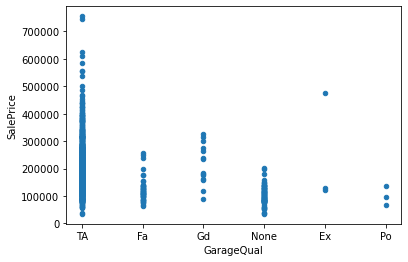

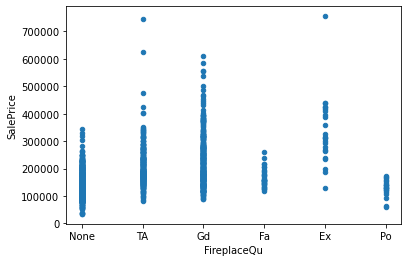

In [28]:
print(data['GarageQual'].unique())
print(data[data['GarageQual'] == 'TA']['GarageQual'].count())
#So I know that the great majority of Garages are considered to be of average quality.
#How many are above average?
print(data[data['GarageQual'].isin(['Ex','Gd'])]['GarageQual'].count())
#Let's take a closer look at the sales price by quality in a scatter plot.
data.plot(x='GarageQual', y='SalePrice', kind='scatter')
plt.show()
#This data isn't very meaningful. I want to see scatterplots of other quality variables to compare.
data.plot(x='FireplaceQu', y='SalePrice', kind='scatter')
plt.show()
#Outliers skew the data, but overall there is a correlation between both garage and fireplace quality,
#and SalePrice. I'm not convinced that they will justify a meaningful increase in sale price, however
#I will keep them for the time being.x

In [29]:
#I'm going to continue replacing null values now.

In [30]:
data[data['MSSubClass']==45]['YearBuilt']

15      1929
21      1930
127     1930
163     1956
325     1941
383     1928
437     1926
514     1926
555     1922
617     1954
826     1924
1069    1949
Name: YearBuilt, dtype: int64

In [31]:
null_columns = data.columns[data.isna().any()].tolist()
for col in null_columns:
    print(data[col].dtype)

object
float64
object
object
object
object
object
object


In [32]:
data['MasVnrType'].replace(to_replace=np.nan, value='None', inplace=True)
data['BsmtQual'].replace(to_replace=np.nan, value='None', inplace=True)
data['BsmtCond'].replace(to_replace=np.nan, value='None', inplace=True)
data['BsmtExposure'].replace(to_replace=np.nan, value='None', inplace=True)
data['BsmtFinType1'].replace(to_replace=np.nan, value='None', inplace=True)
data['BsmtFinType2'].replace(to_replace=np.nan, value='None', inplace=True)
data['Electrical'].replace(to_replace=np.nan, value='None', inplace=True)
data['MasVnrArea'].replace(to_replace=np.nan, value=0.0, inplace=True)
print(data[data['MasVnrArea'] > 2]['MasVnrArea'].count())

589


In [33]:
data.columns[data.isna().any()].tolist()

[]

In [34]:
data.iloc[0:15][['GarageQual','GarageFinish','GarageType','GarageCond']]

,GarageQual,GarageFinish,GarageType,GarageCond
0,TA,RFn,Attchd,TA
1,TA,RFn,Attchd,TA
2,TA,RFn,Attchd,TA
3,TA,Unf,Detchd,TA
4,TA,RFn,Attchd,TA
5,TA,Unf,Attchd,TA
6,TA,RFn,Attchd,TA
7,TA,RFn,Attchd,TA
8,Fa,Unf,Detchd,TA
9,Gd,RFn,Attchd,TA


In [35]:
datapath = '../data'
save_file(data, 'house_data_cleaned.csv', datapath)

Writing file.  "../data/house_data_cleaned.csv"
